# PROJECT: TESTING SESSION DURATION FOR AN ONLINE SHOPPING SITE

## Business Understanding

We have an online shopping site. It is supposed that clients spend 170 seconds in avarage on the site.

Is the time spent on the site 170 sec?

We can test it using "Parametric or Nonparametric One Sample T Test"

## Data Understanding

**Hypotheses:**
    
    H0: μ = 170

    H1: μ ≠ 170
    
H0 claims that the time spent on the site is 170 sec.

## Application

In [25]:
# Import necessary libraries:
import numpy as np
import pandas as pd

### Sample:

In [6]:
records = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119, 
              157, 145, 127, 244, 163, 114, 145,  65, 112, 185, 202, 146,
              203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110, 
              216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])

records[1:10]

array([160, 234, 149, 145, 107, 197,  75, 201, 225])

### Statistics of data:

In [7]:
import scipy.stats as stats

stats.describe(records)

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

### Testing of assumptions:

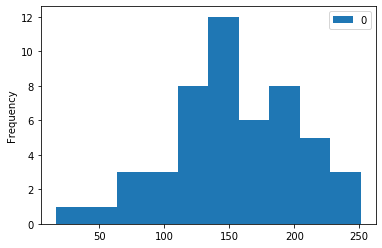

In [18]:
# Histogram:

from matplotlib.pyplot import plot

pd.DataFrame(records).plot.hist();

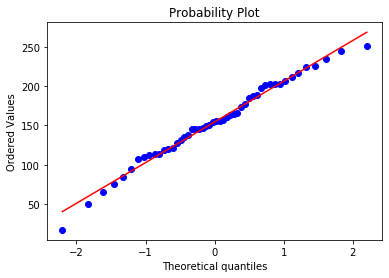

In [21]:
# qqplot:

import pylab 

stats.probplot(records, dist = "norm", plot = pylab)
pylab.show()

In [22]:
# shapiro-wilks:

from scipy.stats import shapiro

shapiro(records)

(0.9853105545043945, 0.7848747968673706)

### One sample T Test:

In [14]:
stats.ttest_1samp(records, popmean = 170 )

Ttest_1sampResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446)

### T table value:

In [15]:
stats.t.ppf(q = 0.025, df = len(records) -1)

-2.0095752344892093

### p value on test statistics:

In [23]:
stats.t.cdf(x = -2.1753117985877966, df = len(records)-1) * 2

0.034460415195071446

### Confidence interval:

In [17]:
import statsmodels.stats.api as sms

sms.DescrStatsW(records).tconfint_mean()

(139.95008462736266, 168.80991537263733)

## Report

**Statistics of data:**

Sample mean is 154.38. There is a difference between 170 and sample mean value. We need to reveal if the difference is statistically significant or not. Also there is a chance factor for the sample mean.


**Testing of assumptions:**

Assumption for 'One Sample T Test' is that the sample must have normal distribution. In order to check it, data was evaluated visually and numerically:

histogram  ->  to observe distribution of the data  ->  It looks like normal distribution.

qqplot  ->  to observe relation of theoretical and ordered values  ->  Ordered values like theoretical values of normal distribution.

shapiro-wilks  ->  (test statistics, p value)  ->  α = 0.05; p > 0.05; So we can't reject H0 which states "there is no difference between theoretical distribution and sample distribution"

The distribution is "normal"  ->  ASSUMPTION IS TRUE


**One sample T Test:**

H0: Average time spent on site is 170 sec.

p < 0.05  ->  Reject H0.

μ is different from 170 sec with 95% confidence interval.


**T table value:**

T estimated = -2.1753117985877966

T table = -2.0095752344892093

Te < Tt  ->  Reject H0.


**Confidence interval:**

The time spent on the site is between 139.95 and 168.81 with statistically 95% confidence.